# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [42]:
# OBSERVATIONS
# 1. As you get closer to the Equator, the cities have higher temperatures. 
# 2. There is not a strong correlation between wind speed and cities latitude.
# 3. Humidity is higher at the Equator. Min is 60% up to 100% with very few outliers.



# the API calls were made on 7/9/2019. 


# import dependencies

import pandas as pd # pandas library
import random 
import time 
import matplotlib.pyplot as plt # for creating/plotting graphs
import numpy as np
from datetime import datetime
import openweathermapy as owm
import csv
from citipy import citipy 
from api_keys import api_key

## Generate Cities List

In [2]:

cities = []

while len(cities)<650:
    
# Getting random Latitude and Longitude 

    x = (random.choice(range(-90,90))) 
    
    y = (random.choice(range(-180,180)))
    
    city = citipy.nearest_city(x,y).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

650

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:


# Create a settings object with your API key and preferred units (as seen in Stu_MapWrap)

settings = {"units": "metric", "appid": api_key}



# Store Data from calls
Weather_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date", "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])

Weather_df.head(5)


,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity


In [4]:
# Counters

count = 1 

err = 0 

sets = 0 

index = 0 


# Time

t0 =time.time()

print(f'Beginning Data Retrieval \n ........................')


# It takes a while to run this. OpenWeather only lets you do 60 api calls per minute. I get my limit to 50.

for city in cities:
    try:
        CityNoSpace = city.replace(" ", "%20") 
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f'{owm.BASE_URL}weather?q={CityNoSpace}&units=imperial&APPID={api_key}')
        city_stats = owm.get_current(city, **settings)
        Weather_df.set_value(index, "City", city_stats["name"])
        Weather_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        Weather_df.set_value(index, "Country", city_stats("sys.country"))
        Weather_df.set_value(index, "Date", city_stats("dt"))
        Weather_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        Weather_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        Weather_df.set_value(index, "Lat", city_stats("coord.lat"))
        Weather_df.set_value(index, "Lng", city_stats("coord.lon"))
        Weather_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
 
    # setting call limit per minutes

    if count == 51: 
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("end of stats loop")
print(f'Could not get data for {err} cities')

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 0 | faanui
http://api.openweathermap.org/data/2.5/weather?q=faanui&units=imperial&APPID=ed8bfdfa232686115aede47997940f20


C:\Users\hjp28\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\hjp28\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\hjp28\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\hjp28\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\hjp28\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] acc

Processing Record 2 of Set 0 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?q=arraial%20do%20cabo&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 3 of Set 0 | kapaa
http://api.openweathermap.org/data/2.5/weather?q=kapaa&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 4 of Set 0 | kahului
http://api.openweathermap.org/data/2.5/weather?q=kahului&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 5 of Set 0 | lagoa
http://api.openweathermap.org/data/2.5/weather?q=lagoa&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 6 of Set 0 | jiddah
http://api.openweathermap.org/data/2.5/weather?q=jiddah&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
HTTP Error 404: Not Found
Processing Record 7 of Set 0 | nautla
http://api.openweathermap.org/data/2.5/weather?q=nautla&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 8 of Set 0 | katsuura
http://api.openweathermap.

Processing Record 5 of Set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?q=bluff&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 6 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 7 of Set 1 | mar del plata
http://api.openweathermap.org/data/2.5/weather?q=mar%20del%20plata&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 8 of Set 1 | hambantota
http://api.openweathermap.org/data/2.5/weather?q=hambantota&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 9 of Set 1 | uyuni
http://api.openweathermap.org/data/2.5/weather?q=uyuni&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 10 of Set 1 | puerto escondido
http://api.openweathermap.org/data/2.5/weather?q=puerto%20escondido&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 11 of Set 1 | mahebourg
http://api.openweatherm

Processing Record 10 of Set 2 | emba
http://api.openweathermap.org/data/2.5/weather?q=emba&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 11 of Set 2 | tsogni
http://api.openweathermap.org/data/2.5/weather?q=tsogni&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 12 of Set 2 | namibe
http://api.openweathermap.org/data/2.5/weather?q=namibe&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 13 of Set 2 | azul
http://api.openweathermap.org/data/2.5/weather?q=azul&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 14 of Set 2 | rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 15 of Set 2 | richards bay
http://api.openweathermap.org/data/2.5/weather?q=richards%20bay&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 16 of Set 2 | grand river south east
http://api.openweathermap.org/data/2.5/weat

Processing Record 13 of Set 3 | samusu
http://api.openweathermap.org/data/2.5/weather?q=samusu&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
HTTP Error 404: Not Found
Processing Record 14 of Set 3 | ust-kuyga
http://api.openweathermap.org/data/2.5/weather?q=ust-kuyga&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 15 of Set 3 | bobrov
http://api.openweathermap.org/data/2.5/weather?q=bobrov&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 16 of Set 3 | rawah
http://api.openweathermap.org/data/2.5/weather?q=rawah&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
HTTP Error 404: Not Found
Processing Record 17 of Set 3 | ponte de sor
http://api.openweathermap.org/data/2.5/weather?q=ponte%20de%20sor&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 18 of Set 3 | huarmey
http://api.openweathermap.org/data/2.5/weather?q=huarmey&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 19 of Set 3 | 

Processing Record 16 of Set 4 | santa luzia
http://api.openweathermap.org/data/2.5/weather?q=santa%20luzia&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 17 of Set 4 | peleduy
http://api.openweathermap.org/data/2.5/weather?q=peleduy&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 18 of Set 4 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?q=cabo%20san%20lucas&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 19 of Set 4 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?q=saint-augustin&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 20 of Set 4 | manado
http://api.openweathermap.org/data/2.5/weather?q=manado&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 21 of Set 4 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
HTTP Error 404: Not Found
Processing

Processing Record 18 of Set 5 | moree
http://api.openweathermap.org/data/2.5/weather?q=moree&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 19 of Set 5 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?q=bambous%20virieux&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 20 of Set 5 | bambanglipuro
http://api.openweathermap.org/data/2.5/weather?q=bambanglipuro&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 21 of Set 5 | torbay
http://api.openweathermap.org/data/2.5/weather?q=torbay&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 22 of Set 5 | namatanai
http://api.openweathermap.org/data/2.5/weather?q=namatanai&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 23 of Set 5 | half moon bay
http://api.openweathermap.org/data/2.5/weather?q=half%20moon%20bay&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 24 of Set 5 | murdochville
http:

Processing Record 21 of Set 6 | bilibino
http://api.openweathermap.org/data/2.5/weather?q=bilibino&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 22 of Set 6 | kupang
http://api.openweathermap.org/data/2.5/weather?q=kupang&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 23 of Set 6 | ewa beach
http://api.openweathermap.org/data/2.5/weather?q=ewa%20beach&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 24 of Set 6 | riberalta
http://api.openweathermap.org/data/2.5/weather?q=riberalta&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 25 of Set 6 | shitanjing
http://api.openweathermap.org/data/2.5/weather?q=shitanjing&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 26 of Set 6 | cody
http://api.openweathermap.org/data/2.5/weather?q=cody&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 27 of Set 6 | zhucheng
http://api.openweathermap.org/data/2.5/weat

Processing Record 24 of Set 7 | flinders
http://api.openweathermap.org/data/2.5/weather?q=flinders&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 25 of Set 7 | mazagao
http://api.openweathermap.org/data/2.5/weather?q=mazagao&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 26 of Set 7 | marsa matruh
http://api.openweathermap.org/data/2.5/weather?q=marsa%20matruh&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 27 of Set 7 | marzuq
http://api.openweathermap.org/data/2.5/weather?q=marzuq&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 28 of Set 7 | bulawayo
http://api.openweathermap.org/data/2.5/weather?q=bulawayo&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 29 of Set 7 | yining
http://api.openweathermap.org/data/2.5/weather?q=yining&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 30 of Set 7 | sentyabrskiy
http://api.openweathermap.org/data/2.

Processing Record 28 of Set 8 | sumbawa
http://api.openweathermap.org/data/2.5/weather?q=sumbawa&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
HTTP Error 404: Not Found
Processing Record 29 of Set 8 | yarada
http://api.openweathermap.org/data/2.5/weather?q=yarada&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 30 of Set 8 | merauke
http://api.openweathermap.org/data/2.5/weather?q=merauke&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 31 of Set 8 | matagami
http://api.openweathermap.org/data/2.5/weather?q=matagami&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 32 of Set 8 | achim
http://api.openweathermap.org/data/2.5/weather?q=achim&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 33 of Set 8 | aberdeen
http://api.openweathermap.org/data/2.5/weather?q=aberdeen&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 34 of Set 8 | lilongwe
http://api.openweathermap.org

Processing Record 32 of Set 9 | pochutla
http://api.openweathermap.org/data/2.5/weather?q=pochutla&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 33 of Set 9 | charters towers
http://api.openweathermap.org/data/2.5/weather?q=charters%20towers&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 34 of Set 9 | usinsk
http://api.openweathermap.org/data/2.5/weather?q=usinsk&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 35 of Set 9 | clarence town
http://api.openweathermap.org/data/2.5/weather?q=clarence%20town&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 36 of Set 9 | novosheshminsk
http://api.openweathermap.org/data/2.5/weather?q=novosheshminsk&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 37 of Set 9 | playas
http://api.openweathermap.org/data/2.5/weather?q=playas&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 38 of Set 9 | marshall
http://ap

Processing Record 35 of Set 10 | ilinskoye-khovanskoye
http://api.openweathermap.org/data/2.5/weather?q=ilinskoye-khovanskoye&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 36 of Set 10 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?q=sao%20joao%20da%20barra&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 37 of Set 10 | solnechnyy
http://api.openweathermap.org/data/2.5/weather?q=solnechnyy&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 38 of Set 10 | ocampo
http://api.openweathermap.org/data/2.5/weather?q=ocampo&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 39 of Set 10 | marquette
http://api.openweathermap.org/data/2.5/weather?q=marquette&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 40 of Set 10 | kindu
http://api.openweathermap.org/data/2.5/weather?q=kindu&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 41 of Set 10

Processing Record 40 of Set 11 | geraldton
http://api.openweathermap.org/data/2.5/weather?q=geraldton&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 41 of Set 11 | dzhusaly
http://api.openweathermap.org/data/2.5/weather?q=dzhusaly&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
HTTP Error 404: Not Found
Processing Record 42 of Set 11 | pareora
http://api.openweathermap.org/data/2.5/weather?q=pareora&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 43 of Set 11 | soyo
http://api.openweathermap.org/data/2.5/weather?q=soyo&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 44 of Set 11 | jever
http://api.openweathermap.org/data/2.5/weather?q=jever&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 45 of Set 11 | posadas
http://api.openweathermap.org/data/2.5/weather?q=posadas&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 46 of Set 11 | leh
http://api.openweathermap.org

Processing Record 44 of Set 12 | rtishchevo
http://api.openweathermap.org/data/2.5/weather?q=rtishchevo&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 45 of Set 12 | kalmunai
http://api.openweathermap.org/data/2.5/weather?q=kalmunai&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 46 of Set 12 | dingle
http://api.openweathermap.org/data/2.5/weather?q=dingle&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 47 of Set 12 | wamba
http://api.openweathermap.org/data/2.5/weather?q=wamba&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 48 of Set 12 | bay roberts
http://api.openweathermap.org/data/2.5/weather?q=bay%20roberts&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 49 of Set 12 | cordoba
http://api.openweathermap.org/data/2.5/weather?q=cordoba&units=imperial&APPID=ed8bfdfa232686115aede47997940f20
Processing Record 50 of Set 12 | ratnagiri
http://api.openweathermap.org/dat

In [5]:
# Display the count of cities with weather data
Weather_df.count()

City          580
Cloudiness    580
Country       580
Date          580
Max Temp      580
Wind Speed    580
Lat           580
Lng           580
Humidity      580
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
Weather_df.to_csv("HP_WeatherPy.csv", encoding='utf-8', index=False)
Weather_df.head(15)

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Faanui,6,PF,1562700749,25.38,6.66,-16.48,-151.75,76
1,Arraial do Cabo,20,BR,1562700750,22,5.1,-22.97,-42.02,56
2,Kapaa,20,US,1562700750,28.33,5.7,22.08,-159.32,83
3,Kahului,20,US,1562700618,28,5.7,20.89,-156.47,69
4,Lagoa,0,PT,1562700750,22.78,6.2,37.14,-8.45,77
5,Nautla,9,MX,1562700750,30.88,7.17,20.22,-96.78,64
6,Katsuura,75,JP,1562700750,23,2.1,33.93,134.5,94
7,Mao,20,DO,1562700750,35,10.8,19.55,-71.08,41
8,Bredasdorp,0,ZA,1562700751,10,1.5,-34.53,20.04,87
9,Itarema,2,BR,1562700707,25.08,3.54,-2.92,-39.92,75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

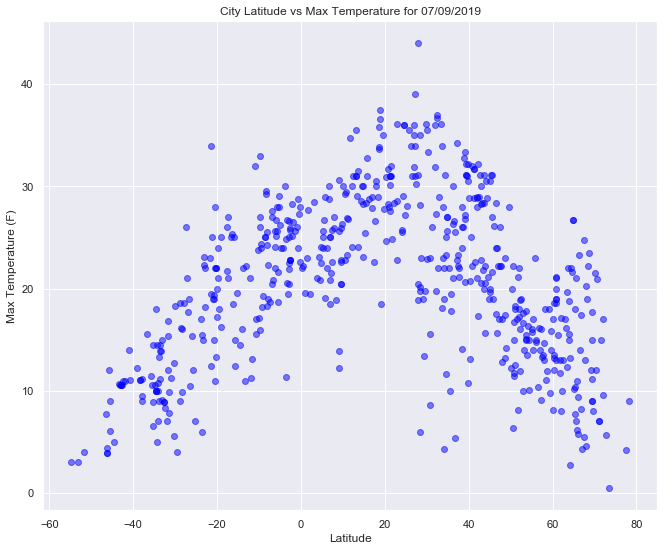

In [45]:
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize=(11,9))
sns.set()
plt.scatter(Weather_df["Lat"], Weather_df["Max Temp"], color='blue', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature for 07/09/2019')
plt.savefig("Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

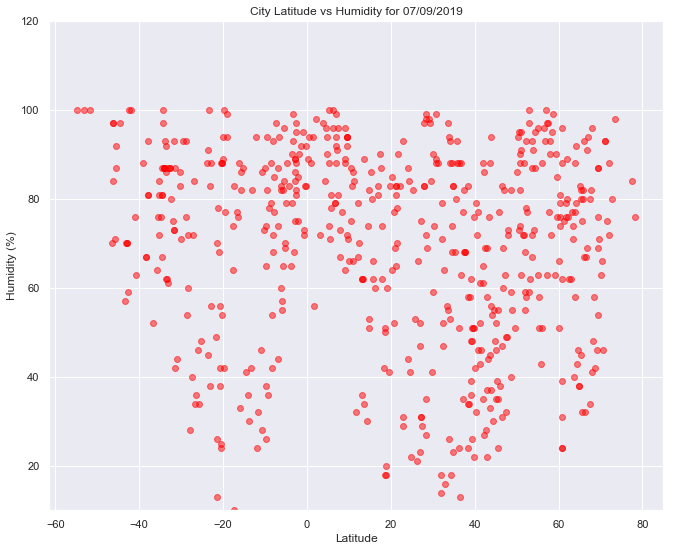

In [44]:
plt.figure(figsize=(11,9))
plt.style.use('ggplot')
sns.set()
plt.scatter(Weather_df["Lat"], Weather_df["Humidity"], color='red', alpha=0.5)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity for 07/09/2019')
plt.savefig("Humidity.png")
plt.show()

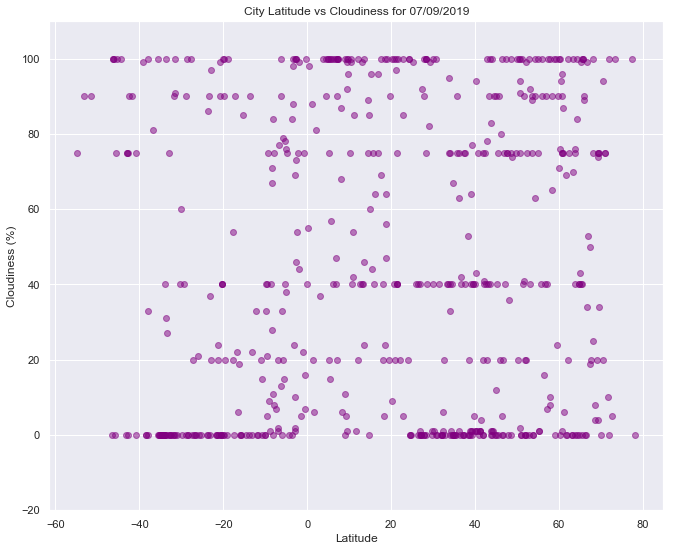

In [46]:
plt.figure(figsize=(11,9))
plt.style.use('ggplot')
sns.set()
plt.scatter(Weather_df["Lat"], Weather_df["Cloudiness"], color='purple', alpha=0.5)

plt.ylim(-20,(Weather_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness for 07/09/2019')
plt.savefig("Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

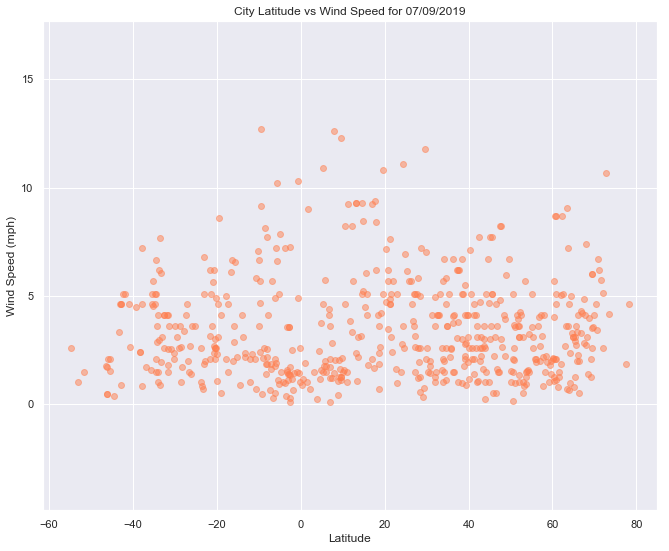

In [47]:
plt.figure(figsize=(11,9))
plt.style.use('ggplot')
sns.set()
plt.scatter(Weather_df["Lat"], Weather_df["Wind Speed"], color='coral', alpha=0.5)

plt.ylim((Weather_df["Wind Speed"].min()-5),(Weather_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')


plt.title('City Latitude vs Wind Speed for 07/09/2019')
plt.savefig("Wind.png")
plt.show()